<a href="https://colab.research.google.com/github/karshingupta/Global-Economic-Health-Sustainability-Simulation/blob/main/03eda_open_with_colab_link.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import math
from scipy import stats
import os
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
energy = pd.read_csv("energy_cleaned.csv")

In [2]:
energy

country  year  electricity_access_%  clean_fuels_access_%  \
0        Algeria  2000              98.97310                 97.10   
1        Algeria  2001              98.96687                 97.30   
2        Algeria  2002              98.95306                 97.80   
3        Algeria  2003              98.93401                 98.00   
4        Algeria  2004              98.91208                 98.20   
...          ...   ...                   ...                   ...   
1486  Uzbekistan  2016             100.00000                 85.20   
1487  Uzbekistan  2017             100.00000                 84.90   
1488  Uzbekistan  2018             100.00000                 84.30   
1489  Uzbekistan  2019             100.00000                 84.60   
1490  Uzbekistan  2020             100.00000                 84.25   

      renewable_energy_share_final  electricity_fossil_fuels_output  \
0                             0.43                            23.84   
1                             0.43                            24.96   
2                             0.51                            25.94   
3                             0.47                            27.54   
4                             0.44                            29.14   
...                            ...                              ...   
1486                          1.61                            48.75   
1487                          1.75                            49.71   
1488                          1.49                            53.58   
1489                          1.57                            53.64   
1490                          1.57                            50.93   

      electricity_nuclear_output  electricity_renewables_output  \
0                            0.0                           0.05   
1                            0.0                           0.07   
2                            0.0                           0.06   
3                            0.0                           0.26   
4                            0.0                           0.25   
...                          ...                            ...   
1486                         0.0                           7.25   
1487                         0.0                           8.35   
1488                         0.0                           5.85   
1489                         0.0                           6.47   
1490                         0.0                           5.01   

      electricity_low_carbon  energy_consumption_per_capita  ...  \
0                   0.209293                       9746.524  ...   
1                   0.279664                       9961.640  ...   
2                   0.230769                      10180.350  ...   
3                   0.935252                      10510.461  ...   
4                   0.850630                      10759.022  ...   
...                      ...                            ...  ...   
1486               12.946428                      16374.342  ...   
1487               14.381675                      16642.676  ...   
1488                9.843514                      16445.740  ...   
1489               10.763600                      16212.221  ...   
1490                8.956025                      15860.609  ...   

      renewable_energy_share_primary  gdp_growth  gdp_per_capita  density  \
0                           0.053235    3.800000     1765.027146       18   
1                           0.065218    3.000000     1740.606654       18   
2                           0.051677    5.600000     1781.828908       18   
3                           0.228104    7.200000     2103.381291       18   
4                           0.206787    4.300000     2610.185422       18   
...                              ...         ...             ...      ...   
1486                        3.567936    5.932151     2704.677188       79   
1487                        3.972285    4.395275     1916.764642       79   


In [3]:
density_order = ['sparse', 'populated', 'packed']
land_area_order = ['small', 'medium', 'large']
gdp_matrix = energy.groupby(['density_category', 'land_area_category'])['gdp_per_capita'].mean().unstack()
gdp_matrix = gdp_matrix.reindex(index=density_order, columns=land_area_order)
fig = go.Figure(data=[go.Surface(z=gdp_matrix.values,
                                 x=land_area_order,
                                 y=density_order,
                                 colorscale='Viridis',
                                 showscale=False)])
quadrant_colors = {'NW': 'red', 'NE': 'blue', 'SW': 'green', 'SE': 'purple'}
fig.add_trace(go.Scatter3d(
    x=energy['land_area_category'],
    y=energy['density_category'],
    z=energy['gdp_per_capita'],
    mode='markers',
    marker=dict(
        size=5,
        color=[quadrant_colors[q] for q in energy['quadrant']],
        opacity=0.6
    ),
    text=energy.apply(lambda row: f"Country: {row['country']}<br>Year: {row['year']}<br>GDP per Capita: ${row['gdp_per_capita']:,.0f}<br>Land Area: {row['land_area_category']}<br>Density: {row['density_category']}<br>Quadrant: {row['quadrant']}", axis=1),
    hoverinfo='text',
    showlegend=False
))
fig.update_layout(
    title='GDP per Capita by Density and Land Area Categories',
    scene=dict(
        xaxis_title='Land Area Category',
        yaxis_title='Density Category',
        zaxis_title='GDP per Capita',
        xaxis=dict(
            ticktext=land_area_order,
            tickvals=list(range(len(land_area_order)))
        ),
        yaxis=dict(
            ticktext=density_order,
            tickvals=list(range(len(density_order)))
        )
    ),
    width=900,
    height=700,
    margin=dict(r=20, l=10, b=10, t=40)
)
fig.update_traces(
    selector=dict(type='surface'),
    hovertemplate='<b>Land Area</b>: %{x}' +
                  '<br><b>Density</b>: %{y}' +
                  '<br><b>GDP per Capita</b>: $%{z:,.0f}<extra></extra>'
)
for quadrant, color in quadrant_colors.items():
    fig.add_trace(go.Scatter3d(
        x=[None], y=[None], z=[None],
        mode='markers',
        marker=dict(size=10, color=color),
        showlegend=True,
        name=f'Quadrant {quadrant}'
    ))
fig.show()

The more elevated surfaces represent higher gdp_per_capita. Sunken surfaces represent lows.

Highest gdp_per_capita occurs at packed, small countries. <br>
Lowest gdp_per_capita occurs at packed, large countries. <br>
Small, packed, countries in the NE quadrant like Luxembourg, Switzerland, and Qatar dominate higher gdp_per_capita values. Being more compact allows for more efficient energy delivery and infrastructure. <br>
Large, packed countries like China, Pakistan, India, Thailand are overburdened by energy demands and lack the infrastructure to meet them. <br>


In [4]:
exclude_columns = ['lat', 'lon', 'gdp_per_capita', 'land_area_category', 'density_category', 'quadrant', 'country', 'year']
columns_to_plot = [col for col in energy.columns if col not in exclude_columns]
num_plots = len(columns_to_plot)
num_rows = math.ceil(num_plots / 3)
fig = sp.make_subplots(
    rows=num_rows,
    cols=3,
    subplot_titles=columns_to_plot,
    horizontal_spacing=0.05,
    vertical_spacing=0.05,
)

custom_colors = ['green', 'blue', 'red']
hue_order = ['small', 'medium', 'large']

for i, column in enumerate(columns_to_plot):
    row = i // 3 + 1
    col = i % 3 + 1

    scatter = px.scatter(
        energy,
        x=column,
        y='gdp_per_capita',
        color='land_area_category',
        category_orders={'land_area_category': hue_order},
        color_discrete_sequence=custom_colors,
        title=f'GDP per Capita vs {column.replace("_", " ").title()}',
        labels={column: column.replace('_', ' ').title(), 'gdp_per_capita': 'GDP per Capita ($)'},
        custom_data=['country', 'year', 'density_category', 'land_area_category', 'quadrant']
    )

    scatter.update_traces(
        hovertemplate="<b>%{customdata[0]}</b><br>" +
                      "Year: %{customdata[1]}<br>" +
                      "GDP per Capita: $%{y:,.0f}<br>" +
                      f"{column.replace('_', ' ').title()}: %{{x}}<br>" +
                      "Density Category: %{customdata[2]}<br>" +
                      "Land Area Category: %{customdata[3]}<br>" +
                      "Quadrant: %{customdata[4]}<extra></extra>"
    )

    for j, trace in enumerate(scatter['data']):
        if row == 1 and col == 1:
            fig.add_trace(trace, row=row, col=col)
        else:
            trace.showlegend = False
            fig.add_trace(trace, row=row, col=col)

fig.update_layout(
    height=400*num_rows,
    width=1200,
    title_text="GDP per Capita vs Features Visualized Through Land Area",
    showlegend=True,
    legend_title_text='Land Area Category',
    margin=dict(l=50, r=50, t=50, b=50),
    font=dict(size=10),
)

for i in fig['layout']['annotations']:
    i['font'] = dict(size=10)

fig.show()

In [5]:
exclude_columns = ['lat', 'lon', 'gdp_per_capita', 'land_area_category', 'density_category', 'quadrant', 'country', 'year']
columns_to_plot = [col for col in energy.columns if col not in exclude_columns]
num_plots = len(columns_to_plot)
num_rows = math.ceil(num_plots / 3)

fig = sp.make_subplots(
    rows=num_rows,
    cols=3,
    subplot_titles=columns_to_plot,
    horizontal_spacing=0.05,
    vertical_spacing=0.05,
)

custom_colors = ['green', 'blue', 'red']
hue_order = ['sparse', 'populated', 'packed']

for i, column in enumerate(columns_to_plot):
    row = i // 3 + 1
    col = i % 3 + 1

    scatter = px.scatter(
        energy,
        x=column,
        y='gdp_per_capita',
        color='density_category',
        category_orders={'density_category': hue_order},
        color_discrete_sequence=custom_colors,
        title=f'GDP per Capita vs {column.replace("_", " ").title()}',
        labels={column: column.replace('_', ' ').title(), 'gdp_per_capita': 'GDP per Capita ($)'},
        custom_data=['country', 'year', 'density_category', 'land_area_category', 'quadrant']
    )

    scatter.update_traces(
        hovertemplate="<b>%{customdata[0]}</b><br>" +
                      "Year: %{customdata[1]}<br>" +
                      "GDP per Capita: $%{y:,.0f}<br>" +
                      f"{column.replace('_', ' ').title()}: %{{x}}<br>" +
                      "Density Category: %{customdata[2]}<br>" +
                      "Land Area Category: %{customdata[3]}<br>" +
                      "Quadrant: %{customdata[4]}<extra></extra>"
    )

    for j, trace in enumerate(scatter['data']):
        if row == 1 and col == 1:
            fig.add_trace(trace, row=row, col=col)
        else:
            trace.showlegend = False
            fig.add_trace(trace, row=row, col=col)

fig.update_layout(
    height=400*num_rows,
    width=1200,
    title_text="GDP per Capita vs Features Visualized Through Density",
    showlegend=True,
    legend_title_text='Density Category',
    margin=dict(l=50, r=50, t=50, b=50),
    font=dict(size=10),
)

for i in fig['layout']['annotations']:
    i['font'] = dict(size=10)

fig.show()

In [6]:
exclude_columns = ['lat', 'lon', 'gdp_per_capita', 'land_area_category', 'density_category', 'quadrant', 'country', 'year']
columns_to_plot = [col for col in energy.columns if col not in exclude_columns]
num_plots = len(columns_to_plot)
num_rows = math.ceil(num_plots / 3)
fig = sp.make_subplots(
    rows=num_rows,
    cols=3,
    subplot_titles=columns_to_plot,
    horizontal_spacing=0.05,
    vertical_spacing=0.05,
)
custom_colors = ['green', 'blue', 'red', 'orange']

for i, column in enumerate(columns_to_plot):
    row = i // 3 + 1
    col = i % 3 + 1
    scatter = px.scatter(
        energy,
        x=column,
        y='gdp_per_capita',
        color='quadrant',
        category_orders={'quadrant': hue_order},
        color_discrete_sequence=custom_colors,
        title=f'GDP per Capita vs {column.replace("_", " ").title()}',
        labels={column: column.replace('_', ' ').title(), 'gdp_per_capita': 'GDP per Capita ($)'},
        custom_data=['country', 'year', 'density_category', 'land_area_category', 'quadrant']
    )
    scatter.update_traces(
        hovertemplate="<b>%{customdata[0]}</b><br>" +
                      "Year: %{customdata[1]}<br>" +
                      "GDP per Capita: $%{y:,.0f}<br>" +
                      f"{column.replace('_', ' ').title()}: %{{x}}<br>" +
                      "Density Category: %{customdata[2]}<br>" +
                      "Land Area Category: %{customdata[3]}<br>" +
                      "Quadrant: %{customdata[4]}<extra></extra>"
    )
    for j, trace in enumerate(scatter['data']):
        if row == 1 and col == 1:
            fig.add_trace(trace, row=row, col=col)
        else:
            trace.showlegend = False
            fig.add_trace(trace, row=row, col=col)
fig.update_layout(
    height=400*num_rows,
    width=1200,
    title_text="GDP per Capita vs Features Visualized Through Quadrant",
    showlegend=True,
    legend_title_text='Density Category',
    margin=dict(l=50, r=50, t=50, b=50),
    font=dict(size=10),
)
for i in fig['layout']['annotations']:
    i['font'] = dict(size=10)
fig.show()

In [7]:
exclude_corr_columns = ['land_area_category', 'density_category', 'quadrant', 'country', 'year']
spearman_corr = energy.drop(columns=exclude_corr_columns).corr(method='spearman')
gdp_corr = spearman_corr['gdp_per_capita']
sorted_gdp_corr = gdp_corr.sort_values(ascending=False)

In [8]:
sorted_gdp_corr

gdp_per_capita                     1.000000
clean_fuels_access_%               0.818422
energy_consumption_per_capita      0.816881
electricity_access_%               0.712920
lat                                0.400999
electricity_low_carbon             0.216348
electricity_nuclear_output         0.189147
renewable_energy_share_primary     0.147627
electricity_renewables_output      0.136840
density                            0.017788
co2_emissions_per_capita          -0.065509
renewable_energy_share_final      -0.085514
electricity_fossil_fuels_output   -0.086948
energy_usage_per_gdp              -0.187062
lon                               -0.271110
land_area                         -0.356269
gdp_growth                        -0.367657
Name: gdp_per_capita, dtype: float64

Strongest correlators with gdp_per_capita: <br>

* clean_fuels_access%(0.81)
* energy_consumption_per_capita (0.81)
* electricity_access_% (0.71)

Weakest correlators with gdp_per_capita: <br>
* land_area (-0.35)
* gdp_growth (-0.36)


In [9]:
exclude_corr_columns = ['land_area_category', 'density_category', 'quadrant', 'country', 'year']
spearman_corr = energy.drop(columns=exclude_corr_columns).corr(method='spearman')
fig = px.imshow(
    spearman_corr,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title='Spearman Correlation Heatmap',
    labels=dict(color='Correlation')
)

fig.update_layout(
    title_x=0.5,
    width=800,
    height=800,
    xaxis_title='Features',
    yaxis_title='Features'
)
fig.show()

energy_consumption_per_capita is strongly correlated with clean_fuels_access_% (0.79) and electricity_access_% (0.71). <br>

Other strong correlations: <br>

* renewable_energy_share_primary and renewable_energy_share_final (0.79)<br>
* renewable_energy_share_primary and electricity_low_carbon (0.85) <br>
* electricity_fossil_fuels_output and co2_emissions_per_capita (0.95) <br>
* land_area and co2_emissions_per_capita (0.69) <br>








In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
exclude_corr_columns = ['land_area_category', 'density_category', 'quadrant', 'country', 'year']
numeric_df = energy.drop(columns=exclude_corr_columns)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)
pca = PCA()
features_PCA = pca.fit(scaled_df)

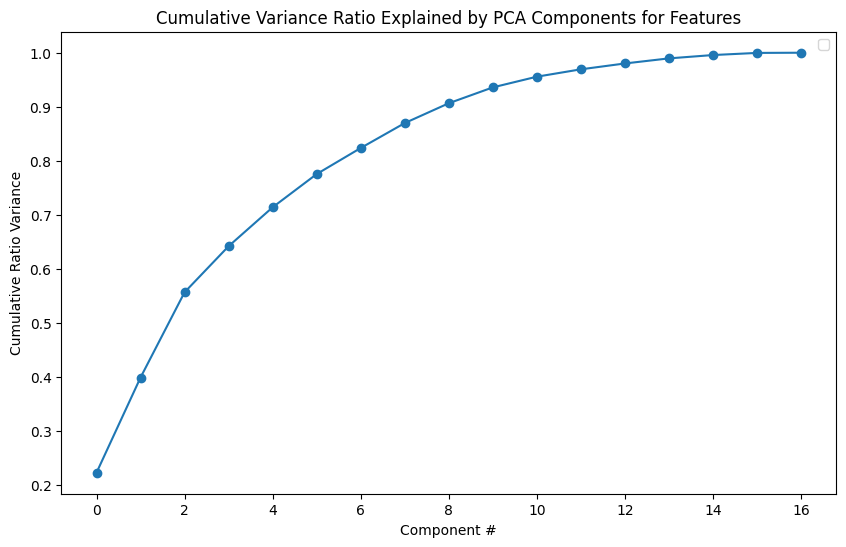

In [11]:
plt.subplots(figsize=(10, 6))
plt.plot(features_PCA.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Component #')
plt.ylabel('Cumulative Ratio Variance')
plt.title('Cumulative Variance Ratio Explained by PCA Components for Features')
plt.legend()
plt.show()

I choose component # 2 as the elbow point.

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

exclude_corr_columns = ['land_area_category', 'density_category', 'quadrant', 'country', 'year']
numeric_df = energy.drop(columns=exclude_corr_columns)

scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)

pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_df)

x = principal_components[:, 0]
y = principal_components[:, 1]
z = principal_components[:, 2]

data = pd.DataFrame({
    'PC1': x,
    'PC2': y,
    'PC3': z,
    'Country': energy['country'],
    'Year': energy['year']
})

fig = make_subplots(rows=2, cols=2, subplot_titles=('PC1 vs PC2', 'PC1 vs PC3', 'PC2 vs PC3'))

plot_combinations = [
    ('PC1', 'PC2', 1, 1),
    ('PC1', 'PC3', 1, 2),
    ('PC2', 'PC3', 2, 1)
]
for pc1, pc2, row, col in plot_combinations:
    fig.add_trace(
        go.Scatter(
            x=data[pc1],
            y=data[pc2],
            mode='markers',
            text=data.apply(lambda row: f"Country: {row['Country']}<br>Year: {row['Year']}", axis=1),
            hoverinfo='text+x+y',
            name=f'{pc1} vs {pc2}'
        ),
        row=row, col=col
    )
    fig.update_xaxes(title_text=pc1, row=row, col=col)
    fig.update_yaxes(title_text=pc2, row=row, col=col)
fig.update_layout(
    height=800,
    width=1000,
    title_text=f'Features summary PCA, {pca.explained_variance_ratio_.sum()*100:.1f}% variance explained',
    showlegend=False
)
fig.show()

PC1 distinctly shows unique groupings for US and China when compared to PC2 and PC3. PC2 vs PC3 is less evident.

In [13]:
scaled_df = pd.DataFrame(scaled_df, columns=numeric_df.columns)

In [14]:
pca_components_df = pd.DataFrame(features_PCA.components_, columns=scaled_df.columns)

def sort_features_by_loading(component):
    return component.abs().sort_values(ascending=False)
for i in range(1):
    print(f"\nTop 10 features for PC1:")
    sorted_features = sort_features_by_loading(pca_components_df.iloc[i])
    print(sorted_features.head(10))


Top 10 features for PC1:
co2_emissions_per_capita           0.483194
electricity_fossil_fuels_output    0.482664
electricity_renewables_output      0.466680
land_area                          0.404643
electricity_nuclear_output         0.366145
lon                                0.073559
electricity_low_carbon             0.055312
gdp_per_capita                     0.051694
density                            0.043888
electricity_access_%               0.040072
Name: 0, dtype: float64


5 Distinct Top Loaders: <br>
1. co2_emissions_per_capita (0.48)
2. electricity_fossil_fuels_output (0.48)
3. electricity_renewables_output (0.46)
4. land_area (0.40)
5. electricity_nuclear_output (0.36)  